<a href="https://colab.research.google.com/github/ANUSHREE1403/House-Price-Prediction/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
path='/content/drive/My Drive/Colab Notebooks/HousePricePrediction-data.csv'

In [10]:
# importing lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df=pd.read_csv(path)

In [12]:
data=df.copy()

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [14]:
data.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA


In [15]:
data.isnull().sum()

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [16]:
data.drop_duplicates(inplace=True)

In [17]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [18]:
data.sample(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4023,2014-07-07 00:00:00,570000.0,3.0,2.0,1640,2808,1.0,0,3,4,820,820,1924,0,3209 S Charles St,Seattle,WA 98144,USA
3253,2014-06-24 00:00:00,218000.0,3.0,1.0,880,18205,1.0,0,0,4,880,0,1945,0,11257 Crestwood Dr S,Seattle,WA 98178,USA
390,2014-05-09 00:00:00,839900.0,4.0,3.5,3810,13592,1.0,0,1,3,2560,1250,2013,1923,2411 Meadow Ave N,Renton,WA 98056,USA


In [19]:
from sklearn.preprocessing import OrdinalEncoder
Oe=OrdinalEncoder()

data[["city","statezip"]]=Oe.fit_transform(data[["city","statezip"]])

In [20]:
data.sample()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
3496,2014-06-26 00:00:00,1990000.0,5.0,3.0,4480,5000,2.5,0,0,5,3420,1060,1902,0,923 14th Ave E,35.0,53.0,USA


In [21]:
df["country"].value_counts()

,count
country,
USA,4600


In [22]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [23]:
x=data.loc[:,[ 'bedrooms', 'bathrooms','sqft_living', 'sqft_lot',
       'floors', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built',"city"]]

In [24]:
x.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'city'],
      dtype='object')

In [25]:
y=data.loc[:,['price']]

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [27]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3450, 10)
(1150, 10)
(3450, 1)
(1150, 1)


In [28]:
# decission tree
from sklearn.tree import DecisionTreeRegressor,export_graphviz
import graphviz
dt=DecisionTreeRegressor(criterion='squared_error',
 max_depth= 4,
 min_samples_leaf= 1,
 min_samples_split= 5,
 random_state= 23)

In [29]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4, min_samples_split=5, random_state=23)

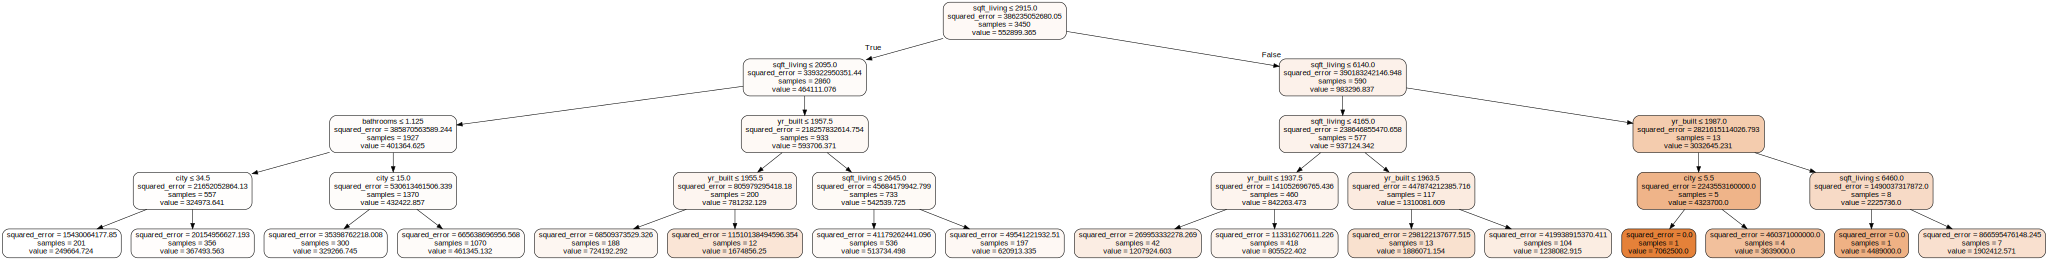

In [30]:
# Export the decision tree to DOT format
dot_data = export_graphviz(dt, feature_names=x.columns, filled=True, rounded=True, special_characters=True, out_file=None)

# Render the DOT data using Graphviz
graph = graphviz.Source(dot_data)
graph

In [31]:
dt.score(x_test,y_test)

0.36569283397565255

In [32]:
y_pred=dt.predict(x_test)

In [33]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mse

71452269320.0253

In [34]:
x.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'city'],
      dtype='object')

In [35]:
dt.feature_importances_

array([0.        , 0.0151195 , 0.78986921, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.14458824, 0.05042305])

In [40]:
# grid search CV
from sklearn.model_selection import GridSearchCV
param_grid={"max_depth":[2,4,6,8,10],
            "criterion":["squared_error","absolute_error"],
            "min_samples_leaf":[1,2,3,4,5],
            "min_samples_split":[2,5,10,15,100],
            "random_state":[23,42]}

GS=GridSearchCV(dt,param_grid,cv=5)
GS.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=4, min_samples_split=5,
                                             random_state=23),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 5, 10, 15, 100],
                         'random_state': [23, 42]})

In [41]:
GS.best_params_

{'criterion': 'absolute_error',
 'max_depth': 6,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'random_state': 42}